### Jakub Ochman    grupa 3.   AiR
#### Zadanie 1
- Macierz sąsiedztwa:
  - Zalety:
    - Łatwość zapisu
    - Łatwość dodawania nowych krawędzi
  - Wady:
    - Trudniejsze zastosowanie w prostych algorytmach
    - Duże zużycie pamięci
- Lista sąsiedztwa:
  - Zalety: 
    - Niskie zużycie pamięci
    - Łatwość dodawania krawędzi i wierzchołków
  - Wady:
    - Sprawdzanie istnienia krawędzi wolniejsze niż w przypadku macierzowego zapisu

#### Zadanie 2.
Aby utworzyć graf nieskierowany najwygodniej użyć listy sąsiedztwa. W tym celu, w języku Python utworzono słownik, gdzie klucz to numer wierzchołka, a wartość to lista sąsiadujacych z danym wierzchołkiem innych wierzchołków. Na początku utworzono graf nieskierowany 

In [100]:
graph = {
    1: [2],
    2: [1, 3, 4],
    3: [2],
    4: [2, 5],
    5: [6, 9],
    6: [7, 5],
    7: [6, 8],
    8: [7],
    9: [5, 10],
    10: [9]
}

Aby w łatwy sposób zaprezentować graf w formie graficznej można posłużyć sie bibliotekami pytona: NetworkX oraz matplotlib. Biblioteka NetworkX możę służyć do pracy na grafach. Posiada wiele sposobów definicji i modyfikacji grafów. Jednak w trakcie ćwiczeń zostanie wykorzystana jedynie do wyświetlenia grafów

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

def print_graph(graph):
    G = nx.Graph()

    for key, items in graph.items():
        for item in items:
            G.add_edge(key, item)
            
    plt.figure(figsize=(6, 6))
    nx.draw(G, with_labels=True, node_color='lightblue', edge_color='gray', node_size=500, font_size=14)
    plt.show()

##### Implementacja algorytmu przeszukiwania wszerz (BFS) w języku python.
 Algorytm polega na przeszukwianiu wierzchołków "warstwami", to znaczy, że najpierw sprawdzane są wszystkie wierzchołki sąsiednie do aktualnie sprawdzanego, dopiero potem sąsiednie do poszczególnych badanych wierzchołków. W celu sprawdzenia cykliczności grafu należy sprawdzić, czy któryś z wierzchołków sąsiaduje z wierzchołkiem już sprawdzanym, który równocześnie nie jest jego "rodzicem". W tym celu należy zdefiniować kolejny słownik, przechowujący: wierzchołek: jego rodzic. Jeśli wierzchołek sąsiedni znajduje się już w głównym słowniku, oraz nie jest rodzicem aktualnie badanebo wierzchołka, to graf zawiera cykl. Aby sprawdzić, czy graf jest spójny, wystarczy porównać rozmiar grafu wejściowego z głównym słownikiem No, jeśli słownik No ma mniej elementów, to znaczy, że algorytm nie dotarł do wszystkich wierzchołków badanego grafu i zakładając poprawność algorytmu można uznać graf za niespójny


In [124]:
def bfs (G, s):
    No = {}         # słownik przechowujący wartości:   numer wierzchołka : kolejność przeszukiwania
    Nr = 1          # Numer wierzchołka
    No[s] = Nr      # wpisanie do słownika pierwszego wierzchołka z numerem 1
    queue_fifo = [] # definicja Kolejki FIFO
    is_cyclic = 0   # definicja zmiennej określającej czy graf jest cykliczny
    is_connected = 1  # definicja zmiennej określającej czy graf jest spójny
    parent = {s: None}  # definicja słownika przechowujacego wartość:  wierzchołek : jego rodzic

    for neighbour in G[s]:   
        queue_fifo.append(neighbour)      # dodanie sąsiadów do kolejki
        parent[neighbour] = s           # dodanie rodzica wierzchołka
    while len(queue_fifo) != 0:   # Dopóki kolejka nie jest pusta
        v = queue_fifo.pop(0)  # Pobranie pierwszego elementu z kolejki
        Nr = Nr + 1            # Inkrementacja numeru wierzchołka
        No[v] = Nr             # Dodanie wierzchołka do słownika
        for neighbour in G[v]:   
            if neighbour not in No:   # Jeśli sąsiedni wierzchołek nie znajduje się w głównym słowniku,
                queue_fifo.append(neighbour) #  to trzeba go dodać do kolejki
                parent[neighbour] = v   # dodanie rodzica wierzchołka
            elif parent[v] != neighbour:   # Jeśli sąsiedni wierzchołek jest w słowniku i nie jest rodzicem
                is_cyclic = 1   # to mamy do czynienia z cyklem

    if len(No) < len(G.keys()):     # Sprawdzenie czy graf jest spójny
        is_connected = 0     # jak słownik ma mniej elementów niż graf, to graf nie jest spójny
        
    # wypisanie wniosków
    print("Kolejność odwiedzania wierzchołków:", *No.keys())
    print("Graf", "Spójny" if is_connected == 1 else "Niespójny")
    print("Graf","Cykliczny" if is_cyclic == 1 else "Acykliczny")
    

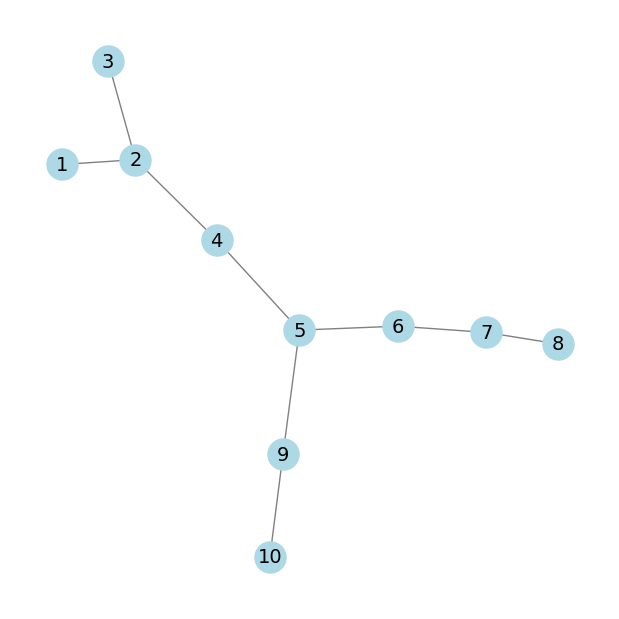

Kolejność odwiedzania wierzchołków: 2 1 3 4 5 6 9 7 10 8
Graf Spójny
Graf Acykliczny


In [134]:
print_graph(graph)

bfs(graph, 2)

#### Zadanie 3
Polegało na zastosowaniu utworzonego algorytmu dla różnych, podanych grafów
##### Graf spójny z cyklami.

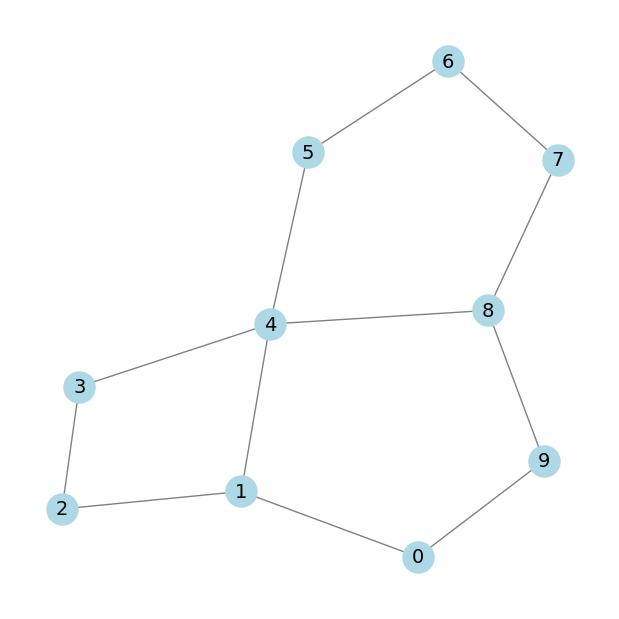

Kolejność odwiedzania wierzchołków: 5 4 6 1 3 8 7 0 2 9
Graf Spójny
Graf Cykliczny


In [135]:
graph1= {
    0: [1, 9],
    1: [0, 2, 4],
    2: [1, 3],
    3: [2, 4],
    4: [1, 3, 5, 8],
    5: [4, 6],
    6: [5, 7],
    7: [6, 8],
    8: [4, 7, 9],
    9: [0, 8]

}

print_graph(graph1)

bfs(graph1, 5)


##### Graf niespójny z cyklami

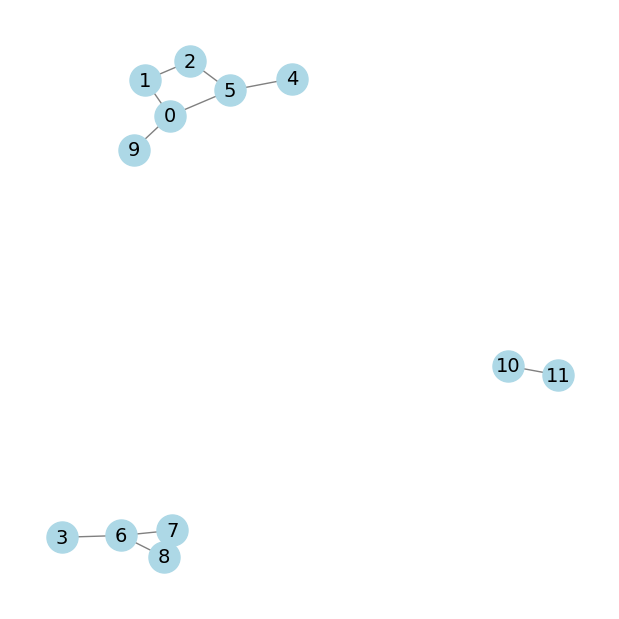

In [136]:
graph2 = {
    0: [1, 9, 5],
    1: [0, 2],
    2: [1, 5],
    3: [6],
    4: [5],
    5: [0, 4, 2],
    6: [7, 8, 3],
    7: [6, 8],
    8: [6, 7],
    9: [0],
    10: [11],
    11: [10]
}

print_graph(graph2)


Poniżej wykonano test dla dwóch różnych wierzchołków znajdujących się w niespójnych częsciach grafu. Jak widać funkcja przeszukała tylko te połączone wierzchołki i zwróciła poprawny wniosek, że dana część grafu jest niespójna oraz cykliczna. Jeśli jedna z tych części byłaby cykliczna, a druga nie, to funkcja zwróciła by dwa różne wyniki odnośnie cykliczności

In [130]:
bfs(graph2, 5)

bfs(graph2, 6)

bfs(graph2, 10)

Kolejność odwiedzania wierzchołków: 5 0 4 2 1 9
Graf Niespójny
Graf Cykliczny
Kolejność odwiedzania wierzchołków: 6 7 8 3
Graf Niespójny
Graf Cykliczny
Kolejność odwiedzania wierzchołków: 10 11
Graf Niespójny
Graf Acykliczny


##### Graf spójny acykliczny
W przypadku grafu spójnego acyklicznego maksymalna liczba krawędzi wynosi n-1, przy czym n to ilość wierzchołków.

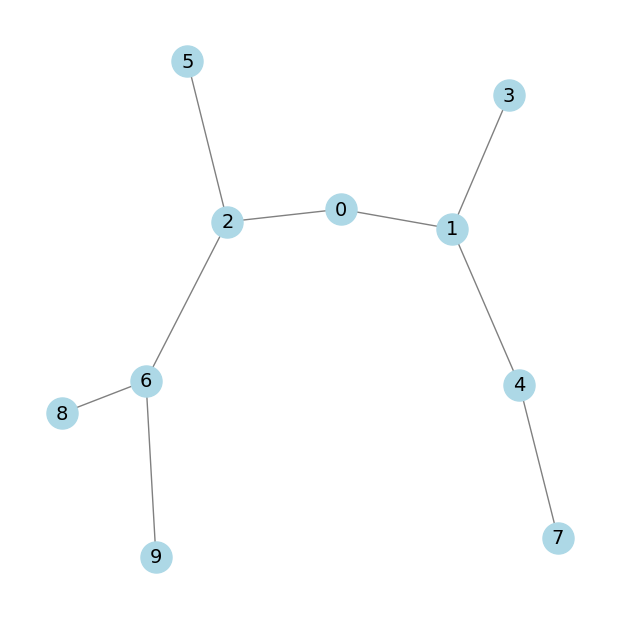

In [137]:
graph3 = {    
    0: [1, 2],
    1: [0, 3, 4],
    2: [0, 5, 6],
    3: [1],
    4: [1, 7],
    5: [2],
    6: [2, 8, 9],
    7: [4],
    8: [6],
    9: [6]
    }

print_graph(graph3)

In [ ]:
bfs(graph3, 6) 

Kolejność odwiedzania wierzchołków: 6 2 8 9 0 5 1 3 4 7
Graf Spójny
Graf Acykliczny


#### Zadanie 4:
- Wierzchołkiem rozspajającym w grafie spójnym G nazywamy wierzchołek, po usunięciu którego graf przestaje być spójny. Aby w najprostszy sposób sprawdzić czy dany wierzchołek jest rozspajający należy porównać ścieżkę między jego sąsiadami, jeśli jest tylko jedna ścieżka i prowadzi przez badany wierzchołek to jest rozspajający. Jeśli natomiast istnieje inna, nieprzechodząca przez badany wierzchołek to nie jest.
- Centrum grafu to wierzchołek, dla którego maksymalna odległość do innych wierzchołków jest najmniejsza.Podczas wykonywania BFS należy zapisywać liczbę kroków (odległość) potrzebnych do dotarcia od danego wierzchołka do innych wierzchołków. Następnie, dla każdego wierzchołka, należy wybrać największą z tych wartości, a następnie porównać je między sobą, aby znaleźć ten wierzchołek, którego maksymalna odległość do innych wierzchołków jest najniższa.
- Stopień wierzchołka to liczba krawędzi wychodzących z danego wierzchołka. Za pomocą algorytmu BFS można w łatwy sposób wyznaczyć stopień każdego wierzchołka.
- Odległość najkrótszej ścieżki do danego wierzchołka. Algorytm BFS nadaje się również do wyznaczania najkrótszej ścieżki między wierzchołkami
- Sprawdzenie czy graf jest drzewem. W prosty sposób można określić, czy graf jest drzewem. Zgodnie z wikipedią drzewo to graf nieskierowany, który jest acykliczny i spójny, czyli taki graf, w którym z każdego wierzchołka drzewa można dotrzeć do każdego innego wierzchołka tylko jednym sposobem.

#### Źródła:
- Na podstawie materiałów z zajęć oraz wykładu
- Na podstawie opisu algorytmów https://pl.wikipedia.org/wiki/Graf_(matematyka)
- Na podstawie teorii https://pl.khanacademy.org/computing/computer-science/algorithms/graph-representation/a/representing-graphs
- Na podstawie teorii https://pl.khanacademy.org/computing/computer-science/algorithms/graph-representation/a/describing-graphs

#### Środowisko:
Jupiter Notebook w Visual Studio Code z rozszerzeniem Jupiter, Python